Use the training data generated to create, train, and test a CNN. Save that CNN for later application in the main program.

In [3]:
%matplotlib inline

In [8]:
from __future__ import print_function
import numpy as np
import glob
import pickle

import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from keras.models import Model, Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras import activations
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping


import time
#import sys
import os

path = r"C:\Users\jakce\Desktop\Final Project\DinoRunner Training Data\images"
testpath = r"C:\Users\jakce\Desktop\Final Project\DinoRunner Training Data\testimages"

In [9]:
#utilities
#some borrowed from 
#https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/

def plot_compare(history):
    steps = len(history.history['acc'])
    acc = (history.history['acc'][:steps])
    validation_acc = (history.history['val_acc'][:steps])
    loss = (history.history['loss'][:steps])
    validation_loss = (history.history['val_loss'][:steps])
    
    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(validation_loss, c='#0f9d58', label='Validation Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Validation Loss: %.3f' % (loss[-1], validation_loss[-1]), fontsize=12)
    plt.legend()
    
    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Accuracy')
    plt.plot(validation_acc, c='#0f9d58', label='Validation Accuracy')
    plt.xticks(range(0, len(acc), 5))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Validation Accuracy: %.3f' % (acc[-1], validation_acc[-1]), fontsize=12)
    plt.legend()
    
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

In [10]:
#create the CNN
#modifying a model from TowardsDataScience, https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

model = Sequential()

#convolution and pooling layers extract features
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1', 
                 input_shape=(40, 120, 1)))
model.add(MaxPooling2D((2, 2), name='maxpool_1'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
model.add(MaxPooling2D((2, 2), name='maxpool_2'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
model.add(MaxPooling2D((2, 2), name='maxpool_3'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'))
model.add(MaxPooling2D((2, 2), name='maxpool_4'))

#flatten model for input to fully-connected layers
model.add(Flatten())

#regularize and robust-ize by dropout
model.add(Dropout(0.5))

#fully connected dense layers for classification
model.add(Dense(256, activation='relu', name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_2'))

#sigmoid output to map output node value to a probability/confidence
model.add(Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
#train the CNN

#load data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        path,
        target_size = (40, 120),
        batch_size = 32,
        class_mode = 'binary',
        color_mode = 'grayscale')

validation_generator = test_datagen.flow_from_directory(
        testpath,
        target_size = (40, 120),
        batch_size = 32,
        class_mode = 'binary',
        color_mode = 'grayscale')

Found 14438 images belonging to 2 classes.
Found 2063 images belonging to 2 classes.


In [12]:
#fit model
early_stop = EarlyStopping(monitor='val_loss', patience=6, verbose=1)
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 50,
            validation_data = validation_generator,
            validation_steps = 50,
            callbacks = [early_stop])

#images = np.array(images)
#history = model.fit(images, labels, epochs = 1, validation_split = 0.2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
100/100 [==============================] - 26s 264ms/step - loss: 0.3083 - accuracy: 0.8662 - val_loss: 0.2413 - val_accuracy: 0.8619
Epoch 2/50
100/100 [==============================] - 19s 186ms/step - loss: 0.2484 - accuracy: 0.8781 - val_loss: 0.2059 - val_accuracy: 0.8931
Epoch 3/50
100/100 [==============================] - 15s 149ms/step - loss: 0.2440 - accuracy: 0.8750 - val_loss: 0.2064 - val_accuracy: 0.8969
Epoch 4/50
100/100 [==============================] - 13s 132ms/step - loss: 0.2472 - accuracy: 0.8794 - val_loss: 0.2327 - val_accuracy: 0.8775
Epoch 5/50
100/100 [==============================] - 12s 117ms/step - loss: 0.2404 - accuracy: 0.8884 - val_loss: 0.2206 - val_accuracy: 0.8825
Epoch 6/50
100/100 [==============================] - 11s 109ms/step - loss: 0.2372 - accuracy: 0.8881 - val_loss: 0.2095 - val_accuracy: 0.9025
Epoch 7/50
100/100 [==============================] - 

In [15]:
#save model

model.save('DinoRunner_AI_Model_interview.h5')
save_history(history, 'history_interview.bin')

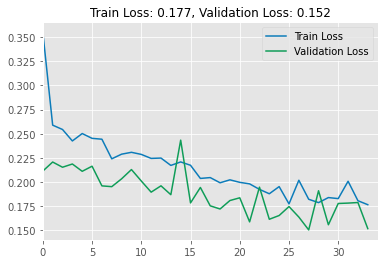

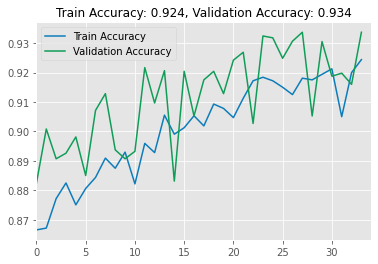

In [17]:
#evaluate performance

#load last model training history since save_history update changed format and broke plotting function
history = load_history('history.bin')
plot_compare(history)